In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import uproot as up

In [315]:
branch_names=['lep_Pt_0','lep_Pt_1','lep_Pt_2',
              'Ptll01',
              'met_met','Mll01','Mll12','Mlll012','best_Z_Mll','minOSSFMll','minOSMll',
              'DRll01','DRll02','DRll12',
              'HT','HT_lep','HT_jets',
              'nJets_OR',
              'DRl2j0','DRl2j1',
              'mj0j1','ml0j0','ml0j1','ml2j0','ml2j1']

signal_events = up.open("hhml_signal.root")['nominal']
ttbar_events = up.open("ttbar.root")['nominal']
vv_events = up.open("vv.root")['nominal']
#print("Variables available: ",signal_events.keys())

df_signal = signal_events.pandas.df(branch_names)
df_ttbar = ttbar_events.pandas.df(branch_names)
#df_signal['class'] = 1

df_vv    = vv_events.pandas.df(branch_names)
#df_vv['class'] = 0

df_signal['class'] =1
df_ttbar['class'] =2
df_vv['class']=0


print("Total Signal events: ",len(df_signal))
print("Total ttbar events: ",len(df_ttbar))
print("Total VV events: ",len(df_vv))


df_bkgrnd = df_ttbar.append(df_vv)
df = df_signal.append(df_bkgrnd)
df = df.sample(frac=1).reset_index(drop=True) # Sort 

# We can rename variables if desired
#df = df.rename(columns={'ss.x_cm':'x'})

# Get some simple derived variables (more human-interpretable; not necessary for deep learning applications, may help simpler algorithms)
#df['log10s2Area_phd'] = np.log10(df['s2Area_phd'])
#df['r_cm'] = np.sqrt(df['x_cm']**2+df['y_cm']**2)

# Separate class info from inputs (no cheating!)
y_df = df.pop('class')


Total Signal events:  25706
Total ttbar events:  7834
Total VV events:  504022


In [316]:
#Split the samples into test and train.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import dump_svmlight_file
from sklearn.externals import joblib
from sklearn.metrics import precision_score


#Reduce to the variables we weant to train on 

X_train,X_test,y_train,y_test = train_test_split(df[branch_names],y_df,test_size=0.2,random_state=0)
#train  = xgb.DMatrix(X_train,y_df)
#test  = xgb.DMatrix(X_train,y_df)

In [317]:
X_train

lep_Pt_0      lep_Pt_1       lep_Pt_2         Ptll01  \
367114   67503.078125  24437.525391   58715.492188   51593.742188   
243953   11374.899414  27985.900391   20283.126953   38911.781250   
252046   42363.484375  55016.156250   70781.343750   61076.687500   
447323   27556.082031  24154.369141   37210.871094   49200.531250   
86513    34107.945312  25115.171875   63863.492188   57752.503906   
...               ...           ...            ...            ...   
359783  147709.156250  15970.467773  133014.484375  163432.593750   
152315   20538.861328  36863.628906   91418.687500   46765.316406   
117952   31448.597656  73206.414062   43752.714844  101680.632812   
435829   37103.257812  17849.257812   63174.066406   50499.500000   
305711   20885.376953  28157.681641   30721.500000   34978.746094   

              met_met         Mll01          Mll12        Mlll012  \
367114   56068.023438  76209.640625   23384.425781  151839.218750   
243953  128028.015625  11936.921875   53825.050781   68693.851562   
252046   23645.224609  78403.898438  104788.375000  173410.531250   
447323   29105.802734  15921.809570   32843.699219   61770.320312   
86513    25911.730469  13256.308594   41090.625000   76955.804688   
...               ...           ...            ...            ...   
359783  234292.546875  48183.515625  174763.484375  387291.000000   
152315  117865.968750  34591.781250  101404.687500  124804.257812   
117952   20693.871094  40431.960938   46453.503906   79482.203125   
435829   27987.679688  22873.824219   77883.789062  144043.906250   
305711   15883.216797  43870.222656   41615.609375   79424.000000   

           best_Z_Mll     minOSSFMll  ...         HT_lep        HT_jets  \
367114  129230.093750  129230.093750  ...  150656.093750   62214.140625   
243953       0.000000       0.000000  ...   59643.929688  231559.031250   
252046   78403.898438   78403.898438  ...  168160.984375   37578.464844   
447323   15921.809570   15921.809570  ...   88921.320312   97611.453125   
86513    13256.308594   13256.308594  ...  123086.609375   31148.099609   
...               ...            ...  ...            ...            ...   
359783       0.000000       0.000000  ...  296694.125000  440589.812500   
152315   64004.964844   34591.781250  ...  148821.171875  263421.781250   
117952   40431.960938   40431.960938  ...  148407.718750  132193.234375   
435829   22873.824219   22873.824219  ...  118126.585938   60034.882812   
305711   43870.222656   43870.222656  ...   79764.562500   28945.224609   

        nJets_OR    DRl2j0    DRl2j1          mj0j1          ml0j0  \
367114         2  3.194663  4.943318   52390.789062  195631.687500   
243953         2  2.221981  1.127081  233559.312500  225706.500000   
252046         1  3.075074  1.246311    8541.980469  125169.539062   
447323         1  2.165559  2.304128    7547.991699   96284.437500   
86513          1  3.948261  2.285115    1619.930664   64093.390625   
...          ...       ...       ...            ...            ...   
359783         4  2.133701  1.710469  204719.250000  439320.125000   
152315         1  4.398820  2.561524   16382.565430  179740.843750   
117952         1  2.853301  2.030221   12140.697266  218258.390625   
435829         2  4.325472  2.571863   57645.351562   25821.373047   
305711         1  4.623510  2.267430    6122.563965   49019.187500   

                ml0j1          ml2j0          ml2j1  
367114  242488.000000  147095.937500  167608.531250  
243953   27683.669922  132541.093750   28353.457031  
252046     105.364067  147505.671875     104.898125  
447323     105.266167  107354.156250     -12.986477  
86513      104.702911   93302.218750     -27.309734  
...               ...            ...            ...  
359783  295117.687500  320578.906250  235240.468750  
152315     105.577805  584048.375000     108.103661  
117952     105.805481  204040.812500      -3.846312  
435829   47518.355469   91396.679688   99019.359375  
305711      -0.8222

In [318]:
##applying weights for unbalanced samples

def CreateBalancedSampleWeights(y_train, largest_class_weight_coef):
    classes = np.unique(y_train, axis = 0)
    classes.sort()
    class_samples = np.bincount(y_train)
    total_samples = class_samples.sum()
    n_classes = len(class_samples)
    weights = total_samples / (n_classes * class_samples * 1.0)
    class_weight_dict = {key : value for (key, value) in zip(classes, weights)}
    class_weight_dict[classes[1]] = class_weight_dict[classes[1]] * largest_class_weight_coef
    sample_weights = [class_weight_dict[y] for y in y_train]
    return sample_weights

In [319]:
largest_class_weight_coef = max(y_df.value_counts().values)/df.shape[0]
weight = CreateBalancedSampleWeights(y_train, largest_class_weight_coef)
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train, weight)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [320]:
X_train.shape

(430049, 25)

In [321]:
X_test.shape

(107513, 25)

In [322]:
y_pred = clf.predict(X_test)
y_pred[0:10]

array([0, 0, 0, 2, 1, 2, 2, 0, 0, 0])

In [323]:
y_test[0:10]

140605    0
467947    0
239684    0
42692     0
196064    1
20834     0
176903    0
363912    0
522048    0
426663    0
Name: class, dtype: int64

In [324]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[81039,  9341, 10412],
       [  769,  3857,   509],
       [  383,   186,  1017]])

In [325]:
ac = accuracy_score(y_test,y_pred)*100
ac

79.9094063043539

<Figure size 432x288 with 0 Axes>

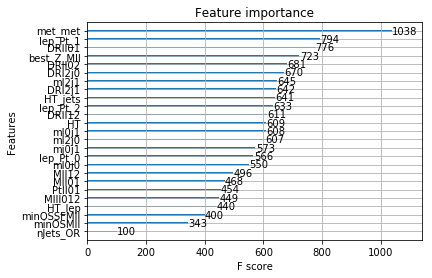

In [326]:
y_pred = clf.predict(X_test)
fig = plt.figure()
xgb.plot_importance(clf)#, ax=plt.gca())
fig.subplots_adjust(left=0.4)

In [327]:
y_pred_prob_train = clf.predict_proba(X_train)
y_pred_prob = clf.predict_proba(X_test)
y_pred_prob[0:10]
#y_pred_prob_train[0:10]

array([[5.0276387e-01, 2.1953504e-01, 2.7770108e-01],
       [9.6122450e-01, 5.5053611e-03, 3.3270173e-02],
       [6.4437258e-01, 1.9826426e-01, 1.5736316e-01],
       [4.6344779e-02, 1.1183668e-01, 8.4181851e-01],
       [1.2455076e-02, 9.4799954e-01, 3.9545342e-02],
       [3.5096383e-01, 1.3904770e-01, 5.0998849e-01],
       [1.4555853e-02, 1.0652073e-01, 8.7892348e-01],
       [9.3830574e-01, 1.6572483e-02, 4.5121830e-02],
       [9.9370015e-01, 8.9836994e-04, 5.4015280e-03],
       [6.2902421e-01, 2.9105726e-01, 7.9918548e-02]], dtype=float32)

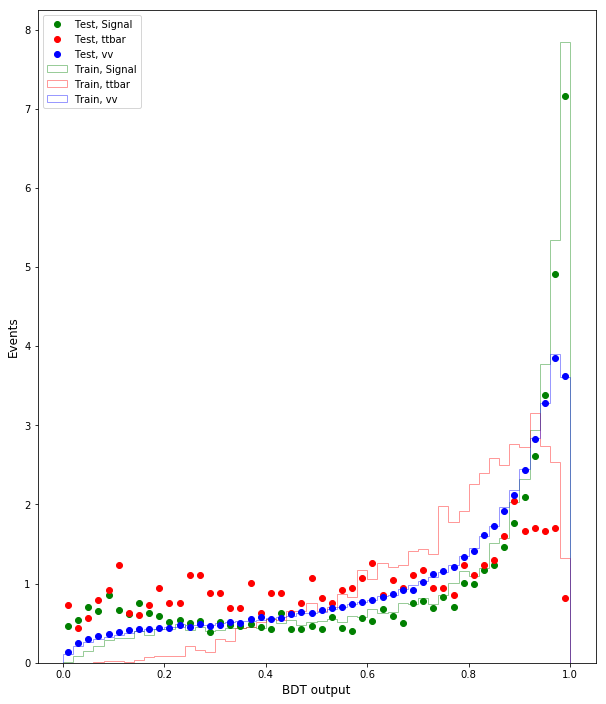

In [328]:
y_pred_DD_train = clf.predict_proba(X_train[y_train==1])
y_pred_DD_test = clf.predict_proba(X_test[y_test==1])
y_pred_ch3t_train = clf.predict_proba(X_train[y_train==2])
y_pred_ch3t_test = clf.predict_proba(X_test[y_test==2])
y_pred_vv_train = clf.predict_proba(X_train[y_train==0])
y_pred_vv_test = clf.predict_proba(X_test[y_test==0])


n_bins=50
hist_range=(0,1.0)
plt.figure(figsize=(10,12))

plt.hist(y_pred_DD_train[:,1],bins=n_bins,range=hist_range,histtype='step' , color="green",density=True,alpha=0.4,label="Train, Signal")
counts,bin_edges = np.histogram(y_pred_DD_test[:,1], bins=n_bins,range=hist_range,density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
plt.plot(bin_centers, counts,marker="o",linestyle="None",color="green",label="Test, Signal")

plt.hist(y_pred_ch3t_train[:,2],bins=n_bins,range=hist_range,histtype='step',density=True,alpha=0.4,color="red",label="Train, ttbar")
counts,bin_edges = np.histogram(y_pred_ch3t_test[:,2], bins=n_bins,range=hist_range,density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
plt.plot(bin_centers, counts,marker="o",linestyle="None",color="red",label="Test, ttbar")

plt.hist(y_pred_vv_train[:,0],bins=n_bins,range=hist_range,histtype='step',density=True,alpha=0.4,color="blue",label="Train, vv")
counts,bin_edges = np.histogram(y_pred_vv_test[:,0],bins=n_bins,range=hist_range,density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
plt.plot(bin_centers, counts,marker="o",linestyle="None",color="blue",label="Test, vv")

plt.xlabel("Prediction from BDT", fontsize=12)
plt.ylabel("Events",fontsize=12)
plt.legend()
plt.xlabel('BDT output')
plt.show()


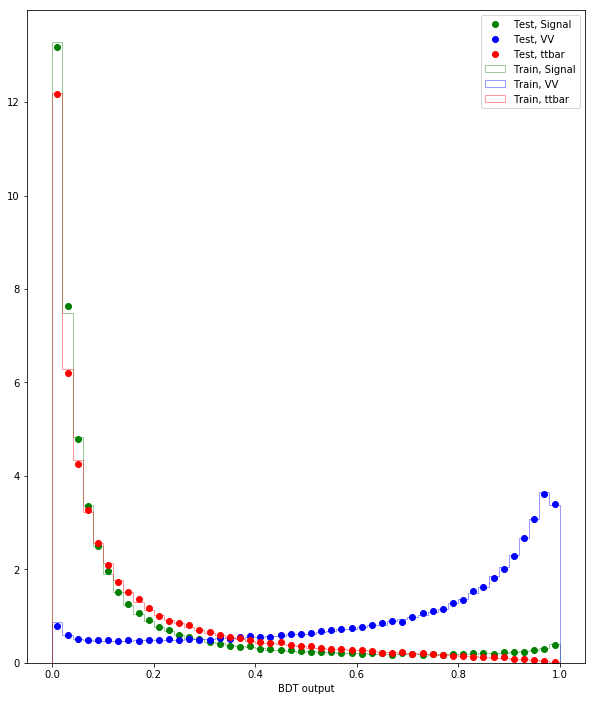

In [329]:
y_pred_prob_train = clf.predict_proba(X_train)
y_pred_prob = clf.predict_proba(X_test)

n_bins=50
hist_range=(0.0,1.0)
plt.figure(figsize=(10,12))


plt.hist(y_pred_prob_train[:,1],bins=n_bins,histtype='step',range=hist_range,density=True,alpha=0.4,color="green",label="Train, Signal")
counts,bin_edges = np.histogram(y_pred_prob[:,1],bins=n_bins,range=hist_range,density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
plt.plot(bin_centers, counts,marker="o",linestyle="None",color="green",label="Test, Signal")


plt.hist(y_pred_prob_train[:,0],bins=n_bins,histtype='step',range=hist_range,density=True,alpha=0.4,color="blue",label="Train, VV")
counts,bin_edges = np.histogram(y_pred_prob[:,0],bins=n_bins,range=hist_range,density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
plt.plot(bin_centers, counts,marker="o",linestyle="None",color="blue",label="Test, VV")


plt.hist(y_pred_prob_train[:,2],bins=n_bins,histtype='step',range=hist_range,density=True,alpha=0.4,color="red", label="Train, ttbar")
counts,bin_edges = np.histogram(y_pred_prob[:,2],bins=n_bins,range=hist_range,density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
plt.plot(bin_centers, counts,marker="o",linestyle="None",color="red",label="Test, ttbar")

plt.legend()
plt.xlabel('BDT output')
plt.show()


In [341]:
y_test[0:10]

entry
107065    2
434407    2
206144    2
9152      2
162524    2
20834     0
143363    2
330372    2
488508    2
393123    2
Name: class, dtype: int64

In [330]:
y_pred_DD_test_o = clf.predict(X_test[y_test==2])
y_pred_DD_test_o[0:1000]

array([2, 0, 0, 0, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 0, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 1, 0, 2, 2,
       0, 0, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 2, 0, 0, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2,
       0, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 2, 2, 2, 2, 2, 1,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 1, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,

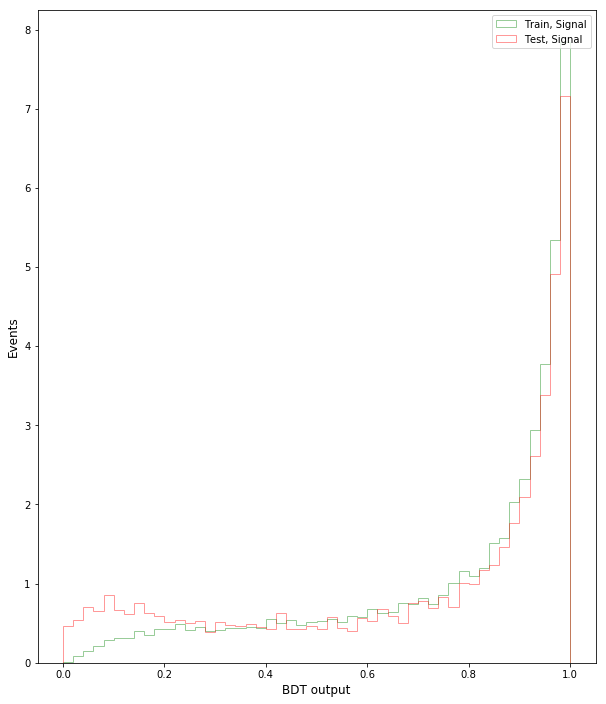

In [331]:
n_bins=50
hist_range=(0,1.0)
plt.figure(figsize=(10,12))

plt.hist(y_pred_DD_train[:,1],bins=n_bins,range=hist_range,histtype='step' , color="green",density=True,alpha=0.4,label="Train, Signal")
#counts,bin_edges = np.histogram(y_pred_DD_test[:,1], bins=n_bins,range=hist_range,density=True)
#bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
#plt.plot(bin_centers, counts,marker="o",linestyle="None",color="green",label="Test, Signal")
plt.hist(y_pred_DD_test[:,1],bins=n_bins,range=hist_range,histtype='step' , color="red",density=True,alpha=0.4,label="Test, Signal")

plt.xlabel("Prediction from BDT", fontsize=12)
plt.ylabel("Events",fontsize=12)
plt.legend()
plt.xlabel('BDT output')
plt.show()


In [332]:
#Hyper parameter optimization
#https://www.kaggle.com/prashant111/a-guide-on-xgboost-hyperparameters-tuning
import pickle
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        #'n_estimators': 100,
        'n_estimators': hp.quniform('n_estimators', 10, 500, 1),
        'objective':hp.choice('objective',['multi:softprob','multi:softmax']),
        #'objective':hp.choice('objective',['binary:logistic','binary:hinge']),
        'seed': 0
    }

def objective(space):
    clf=xgb.XGBClassifier(num_class=3,
                    objective= space['objective'],
                    n_estimators =int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),reg_lambda = int(space['reg_lambda']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']),tree_method='gpu_hist')
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation,eval_metric="merror",
            early_stopping_rounds=5,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [333]:
trials = Trials()

best_hyperparams = fmin(fn = objective,space = space,algo = tpe.suggest, max_evals = 100,trials = trials)

SCORE:                                                 
0.9374866295238715                                     
SCORE:                                                                            
0.9374866295238715                                                                
SCORE:                                                                            
0.9374866295238715                                                                
SCORE:                                                                            
0.9374866295238715                                                                
SCORE:                                                                            
0.9374866295238715                                                                
SCORE:                                                                            
0.9374866295238715                                                                
SCORE:                                                    

SCORE:                                                                             
0.9374866295238715                                                                 
SCORE:                                                                             
0.9374866295238715                                                                 
SCORE:                                                                             
0.9374866295238715                                                                 
SCORE:                                                                             
0.9374866295238715                                                                 
SCORE:                                                                             
0.9374866295238715                                                                 
SCORE:                                                                             
0.9374866295238715                                                          

0.9374866295238715                                                                 
SCORE:                                                                             
0.9374866295238715                                                                 
SCORE:                                                                             
0.9374866295238715                                                                 
100%|██████████| 100/100 [01:46<00:00,  1.07s/trial, best loss: -0.9374866295238715]


In [334]:
best_hyperparams

{'colsample_bytree': 0.8622098739916602,
 'gamma': 8.600643533059355,
 'max_depth': 16.0,
 'min_child_weight': 9.0,
 'n_estimators': 434.0,
 'objective': 1,
 'reg_alpha': 90.0,
 'reg_lambda': 0.8055241046674056}

In [335]:
best_hyperparams['num_class'] = 3
best_hyperparams['max_depth'] = int(best_hyperparams['max_depth'])
best_hyperparams['n_estimators'] = int (best_hyperparams['n_estimators'])
best_hyperparams['tree_method'] = 'gpu_hist'
best_hyperparams['objective'] = "multi:softprob"
clf_opt = xgb.XGBClassifier(**best_hyperparams)
#clf_opt = xgb.XGBModel(**best_hyperparams)
xbgm = clf_opt.fit(X_train, y_train, weight)
clf_opt.save_model('vv_ttbar_bdt.xgb')
xbgm

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8622098739916602,
              gamma=8.600643533059355, gpu_id=0, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=16, min_child_weight=9.0, missing=nan,
              monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
              n_estimators=434, n_jobs=0, num_class=3, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=90.0,
              reg_lambda=0.8055241046674056, scale_pos_weight=None, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

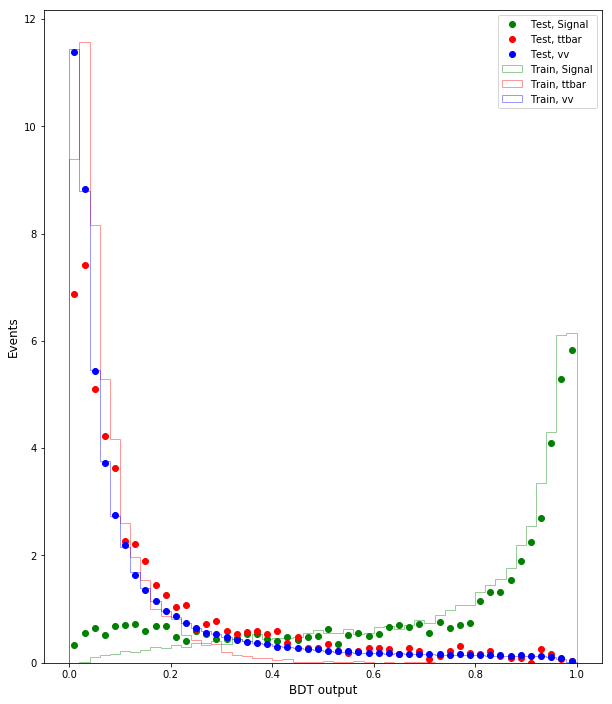

In [336]:
y_pred_DD_train_opt = clf_opt.predict_proba(X_train[y_train==1])
y_pred_DD_test_opt = clf_opt.predict_proba(X_test[y_test==1])
y_pred_ch3t_train_opt = clf_opt.predict_proba(X_train[y_train==2])
y_pred_ch3t_test_opt = clf_opt.predict_proba(X_test[y_test==2])
y_pred_vv_train_opt = clf_opt.predict_proba(X_train[y_train==0])
y_pred_vv_test_opt = clf_opt.predict_proba(X_test[y_test==0])


n_bins=50
hist_range=(0,1.0)
plt.figure(figsize=(10,12))

plt.hist(y_pred_DD_train_opt[:,1],bins=n_bins,range=hist_range,histtype='step' , color="green",density=True,alpha=0.4,label="Train, Signal")
counts,bin_edges = np.histogram(y_pred_DD_test_opt[:,1], bins=n_bins,range=hist_range,density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
plt.plot(bin_centers, counts,marker="o",linestyle="None",color="green",label="Test, Signal")

plt.hist(y_pred_ch3t_train_opt[:,1],bins=n_bins,range=hist_range,histtype='step',density=True,alpha=0.4,color="red",label="Train, ttbar")
counts,bin_edges = np.histogram(y_pred_ch3t_test_opt[:,1], bins=n_bins,range=hist_range,density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
plt.plot(bin_centers, counts,marker="o",linestyle="None",color="red",label="Test, ttbar")

plt.hist(y_pred_vv_train_opt[:,1],bins=n_bins,range=hist_range,histtype='step',density=True,alpha=0.4,color="blue",label="Train, vv")
counts,bin_edges = np.histogram(y_pred_vv_test_opt[:,1],bins=n_bins,range=hist_range,density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
plt.plot(bin_centers, counts,marker="o",linestyle="None",color="blue",label="Test, vv")

plt.xlabel("Prediction from BDT", fontsize=12)
plt.ylabel("Events",fontsize=12)
plt.legend()
plt.xlabel('BDT output')
plt.show()

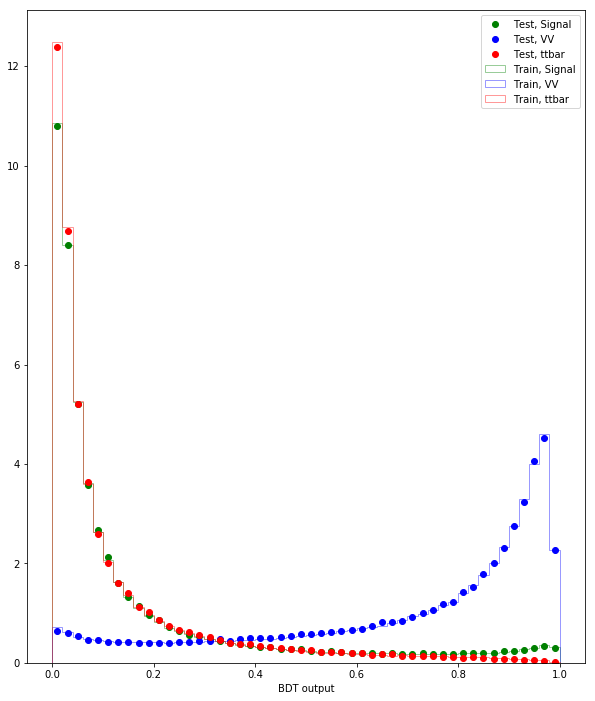

In [337]:
y_pred_prob_train_opt = clf_opt.predict_proba(X_train)
y_pred_prob_opt = clf_opt.predict_proba(X_test)

n_bins=50
hist_range=(0.0,1.0)
plt.figure(figsize=(10,12))


plt.hist(y_pred_prob_train_opt[:,1],bins=n_bins,histtype='step',range=hist_range,density=True,alpha=0.4,color="green",label="Train, Signal")
counts,bin_edges = np.histogram(y_pred_prob_opt[:,1],bins=n_bins,range=hist_range,density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
plt.plot(bin_centers, counts,marker="o",linestyle="None",color="green",label="Test, Signal")


plt.hist(y_pred_prob_train_opt[:,0],bins=n_bins,histtype='step',range=hist_range,density=True,alpha=0.4,color="blue",label="Train, VV")
counts,bin_edges = np.histogram(y_pred_prob_opt[:,0],bins=n_bins,range=hist_range,density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
plt.plot(bin_centers, counts,marker="o",linestyle="None",color="blue",label="Test, VV")


plt.hist(y_pred_prob_train_opt[:,2],bins=n_bins,histtype='step',range=hist_range,density=True,alpha=0.4,color="red", label="Train, ttbar")
counts,bin_edges = np.histogram(y_pred_prob_opt[:,2],bins=n_bins,range=hist_range,density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
plt.plot(bin_centers, counts,marker="o",linestyle="None",color="red",label="Test, ttbar")

plt.legend()
plt.xlabel('BDT output')
plt.show()


In [338]:
y_pred_train_opt = clf_opt.predict(X_train)
y_pred_test_opt = clf_opt.predict(X_test)
y_pred_train_opt

array([0, 1, 0, ..., 0, 0, 0])

In [339]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_test_opt)
cm

array([[84196,  9162,  7434],
       [  808,  3914,   413],
       [  455,   195,   936]])

In [341]:
ac = accuracy_score(y_test,y_pred_test_opt)*100
ac

82.82347251030107

<Figure size 432x288 with 0 Axes>

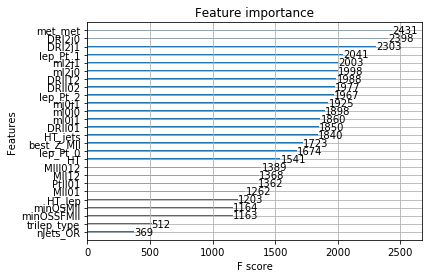

In [309]:
fig = plt.figure()
xgb.plot_importance(clf_opt)#, ax=plt.gca())
fig.subplots_adjust(left=0.4)